# U.S. Medical Insurance Costs

This project aims to address the following questions:

1. What is the distribution of male and female respondents within the dataset?
2. How is the distribution of male and female respondents across different regions?
3. What are the age ranges of the youngest and oldest respondents?
4. Which region exhibits the highest prevalence of smoking among its population?
5. What is the count of male and female smokers within specific age brackets?
6. In which region do individuals typically have a higher number of children?
7. From which regions do male and female respondents with the highest and lowest BMI originate?
8. What is the average expenditure on insurance among individuals from each region?
9. How does the average insurance expenditure differ between smokers and non-smokers?
10. To what degree do five variables (age, gender, BMI, number of children, smoking habits) influence the cost of insurance?

### 1. What is the distribution of male and female respondents within the dataset?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

insurance_df = pd.read_csv('insurance.csv')

In [3]:
print(insurance_df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
insurance_df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

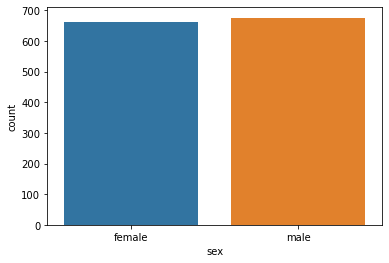

In [5]:
sns.countplot(x = "sex", data = insurance_df)

### 2. How is the distribution of male and female respondents across different regions?

In [6]:
sex_region_group = insurance_df.groupby(['region', 'sex']).size().reset_index(name="count")
s_reg_pt = sex_region_group.pivot_table(index="sex", columns = "region", values = "count")

print(s_reg_pt)

region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163


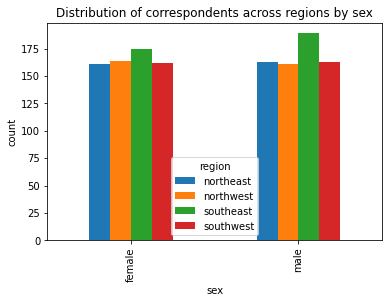

In [7]:
s_reg_pt.plot(kind = "bar")

plt.xlabel("sex")
plt.ylabel("count")
plt.title("Distribution of correspondents across regions by sex")

plt.show()

### 3. What are the age ranges of the youngest and oldest respondents?

In [8]:
youngest = insurance_df["age"].min()
oldest = insurance_df["age"].max()

print(youngest)
print(oldest)

18
64


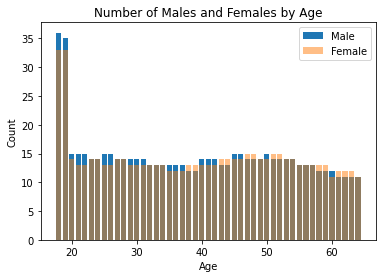

In [9]:
sex_age_group = insurance_df.groupby(['sex', 'age']).size().reset_index(name="count")


female_age = sex_age_group[sex_age_group["sex"] == "female"]
male_age = sex_age_group[sex_age_group["sex"] == "male"]

plt.bar(male_age["age"], male_age["count"], label = "Male")
plt.bar(female_age["age"], female_age["count"], label = "Female", alpha = 0.5)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Number of Males and Females by Age")
plt.legend()

plt.show()

### 4. Which region exhibits the highest prevalence of smoking among its population?

      region  total
0  northeast    324
1  northwest    325
2  southeast    364
3  southwest    325
      region  total smoker  count   percent
0  northeast    324    yes     67  0.206790
1  northwest    325    yes     58  0.178462
2  southeast    364    yes     91  0.250000
3  southwest    325    yes     58  0.178462


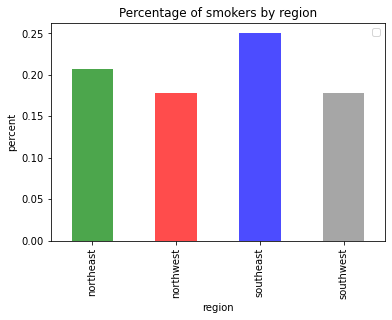

In [10]:
region_smoker = insurance_df.loc[:,['region', 'smoker']] #subsetting region and smoker from data

region_smoker_count = region_smoker.groupby('region').size().reset_index(name='total') #count of total respondents in each region
print(region_smoker_count)


# Number of respondents in each region is different.
# Thus, to explore which regions has more smokers we need to look at the percentage (smoker / no. of resp.)


smoker_yes = region_smoker[region_smoker['smoker'] == 'yes'] #filter only smokers
smoker_yes_group = smoker_yes.groupby(['region', 'smoker']).size().reset_index(name='count')


#Now let's merge two data sets on region

region_smoker_merged = region_smoker_count.merge(smoker_yes_group, on = 'region')
region_smoker_merged['percent'] = region_smoker_merged['count'] / region_smoker_merged['total']

print(region_smoker_merged) # according to the data, one out of every four respondents in the southeastern region is a smoker


region_smoker_merged.plot(x = 'region', y = 'percent', kind='bar', color = ['green', 'red', 'blue', 'grey'], alpha = 0.7)
plt.xlabel('region')
plt.ylabel('percent')
plt.title('Percentage of smokers by region')
plt.legend('')
plt.show()

### 5. What is the count of male and female smokers within specific age brackets?

       sex  age  count  age_bins age_by_decade
0   female   18      4  (10, 19]           10s
1   female   19      9  (10, 19]           10s
2   female   20      4  (19, 29]           20s
3   female   21      1  (19, 29]           20s
4   female   22      2  (19, 29]           20s
..     ...  ...    ...       ...           ...
84    male   60      4  (59, 69]           60s
85    male   61      3  (59, 69]           60s
86    male   62      3  (59, 69]           60s
87    male   63      1  (59, 69]           60s
88    male   64      3  (59, 69]           60s

[89 rows x 5 columns]
   age_by_decade     sex  count
0            10s  female     13
1            10s    male     17
2            20s  female     24
3            20s    male     32
4            30s  female     22
5            30s    male     36
6            40s  female     28
7            40s    male     34
8            50s  female     15
9            50s    male     26
10           60s  female     13
11           60s    male     

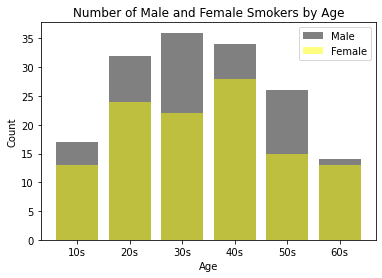

In [11]:
smoker_by_age_and_sex = insurance_df[insurance_df['smoker'] == 'yes'].groupby(['sex', 'age']).size().reset_index(name = 'count')

smoker_by_age_and_sex['age_bins'] = pd.cut(x = smoker_by_age_and_sex['age'], bins = [10, 19, 29, 39, 49, 59, 69])
smoker_by_age_and_sex['age_by_decade'] = pd.cut(x = smoker_by_age_and_sex['age'], 
                                                bins = [10, 19, 29, 39, 49, 59, 69], 
                                                labels = ['10s', '20s', '30s', '40s', '50s', '60s'])

print(smoker_by_age_and_sex)

smoker_df = smoker_by_age_and_sex.groupby(['age_by_decade', 'sex'])['count'].sum().reset_index(name='count')
print(smoker_df)


f_df = smoker_df[smoker_df["sex"] == "female"]
m_df = smoker_df[smoker_df["sex"] == "male"]

plt.bar(m_df["age_by_decade"], m_df["count"], label = "Male", color = 'grey')
plt.bar(f_df["age_by_decade"], f_df["count"], label = "Female", alpha = 0.5, color = 'yellow')

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Number of Male and Female Smokers by Age")
plt.legend()


plt.show()

### 6. In which region do individuals typically have a higher number of children?

In [12]:
# Total number of children in each region

total_children = insurance_df.groupby('region', as_index = False)['children'].sum() # First to find the number of children by region
display(total_children)

# Regions with 3+ kids
more_children_region = insurance_df[insurance_df['children'] >= 3].groupby('region')['children'].count().reset_index(name = '3+ kids')

# Ratio of 3+ kids to total number of kids by region
children_region_merged = total_children.merge(more_children_region, on='region')
children_region_merged['ratio'] = children_region_merged['3+ kids'] / children_region_merged['children']
display(children_region_merged)


,region,children
0,northeast,339
1,northwest,373
2,southeast,382
3,southwest,371


,region,children,3+ kids,ratio
0,northeast,339,49,0.144543
1,northwest,373,53,0.142091
2,southeast,382,46,0.120419
3,southwest,371,52,0.140162


children,3,4,5
region,,,
northeast,39,7,3
northwest,46,6,1
southeast,35,5,6
southwest,37,7,8


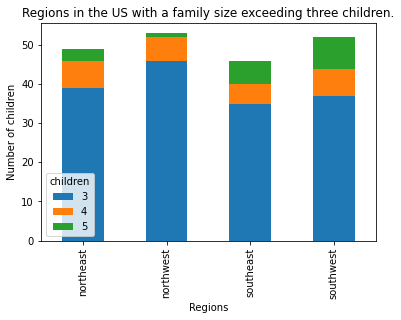

In [29]:
# Visualizatin of regions with more than 3 kids
children_summary = insurance_df[insurance_df['children'] >= 3].groupby(['region', 'children'])['children'].count().reset_index(name='count')
children_summary_detailed = children_summary.pivot_table(values='count', index='region', columns = 'children')
display(children_summary_detailed)

children_summary_detailed.plot(kind='bar', stacked = True)
plt.xlabel('Regions')
plt.ylabel('Number of children')
plt.title('Regions in the US with a family size exceeding three children.')
plt.show()

### 7. From which regions do male and female respondents with the highest and lowest BMI originate?

In [14]:
max_bmi = insurance_df.groupby(['region', 'sex', 'age'], as_index = False)['bmi'].max()


female_max_bmi = max_bmi[max_bmi['sex'] == 'female']['bmi'].max()
f_max_bmi = max_bmi[(max_bmi['sex'] == 'female') & (max_bmi['bmi'] == female_max_bmi)]


print('The highest BMI of a female in this data is ' + str(f_max_bmi.iloc[0, 3]) 
      + '. She is ' + str(f_max_bmi.iloc[0, 2]) + ' years old and lives in ' + str(f_max_bmi.iloc[0, 0]) + '.')

male_max_bmi = max_bmi[max_bmi['sex'] == 'male']['bmi'].max()
m_max_bmi = max_bmi[(max_bmi['sex'] == 'male') & (max_bmi['bmi'] == male_max_bmi)]


print('The highest BMI of a male in this data is ' + str(m_max_bmi.iloc[0, 3]) 
      + '. He is ' + str(m_max_bmi.iloc[0, 2]) + ' years old and lives in ' + str(f_max_bmi.iloc[0, 0]) + '.')




The highest BMI of a female in this data is 48.07. She is 46 years old and lives in northeast.
The highest BMI of a male in this data is 53.13. He is 18 years old and lives in northeast.


In [15]:
min_bmi = insurance_df.groupby(['region', 'sex', 'age'], as_index = False)['bmi'].min()


female_min_bmi = min_bmi[min_bmi['sex'] == 'female']['bmi'].min()
f_min_bmi = min_bmi[(min_bmi['sex'] == 'female') & (min_bmi['bmi'] == female_min_bmi)]


print('The lowest BMI of a female in this data is ' + str(f_min_bmi.iloc[0, 3]) 
      + '. She is ' + str(f_min_bmi.iloc[0, 2]) + ' years old and lives in ' + str(f_min_bmi.iloc[0, 0]) + '.')


male_min_bmi = min_bmi[min_bmi['sex'] == 'male']['bmi'].min()
m_min_bmi = min_bmi[(min_bmi['sex'] == 'male') & (min_bmi['bmi'] == male_min_bmi)]


print('The lowest BMI of a male in this data is ' + str(f_min_bmi.iloc[0, 3]) 
      + '. He is ' + str(f_min_bmi.iloc[0, 2]) + ' years old and lives in ' + str(f_min_bmi.iloc[0, 0]) + '.')

The lowest BMI of a female in this data is 16.815. She is 21 years old and lives in northeast.
The lowest BMI of a male in this data is 16.815. He is 21 years old and lives in northeast.


In [16]:
bmi_df = insurance_df.loc[:, ['region', 'age', 'bmi']]
bmi_df['age_by_decade'] = pd.cut(x=bmi_df['age'], bins=[10, 19, 29, 39, 49, 59, 69],
                                          labels=['10s', '20s', '30s', '40s', '50s', '60s'])


bmi_df_updated = bmi_df.loc[:, ['region', 'age_by_decade', 'bmi']].groupby(['region', 'age_by_decade'])['bmi'].mean().reset_index(name='bmi')


display(bmi_df_updated.pivot_table(index = 'region', columns = 'age_by_decade', values = 'bmi'))

age_by_decade,10s,20s,30s,40s,50s,60s
region,,,,,,
northeast,28.562344,27.733116,28.457951,29.591103,30.448209,30.980556
northwest,28.639706,28.493015,28.385397,30.257500,29.946591,29.175179
southeast,33.893750,32.976533,33.613768,32.749367,33.700857,33.773548
southwest,27.825806,29.647059,30.945312,29.872727,31.819118,33.910714


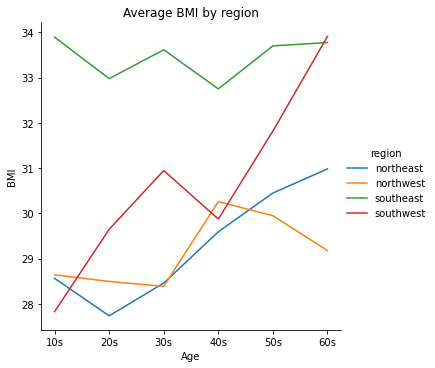

In [17]:
sns.relplot(data = bmi_df_updated, kind = 'line', x = bmi_df_updated['age_by_decade'],
           y = bmi_df_updated['bmi'], hue = 'region')


plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Average BMI by region")
plt.show()

### 8. What is the average expenditure on insurance among individuals from each region?

,region,average_amount
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


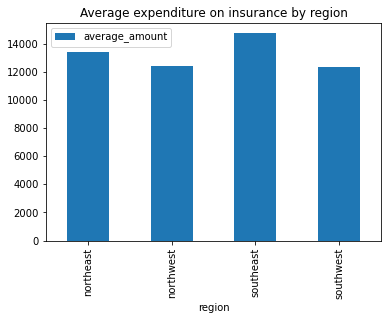

In [30]:
ins_by_region = insurance_df.groupby('region')['charges'].mean().reset_index(name='average_amount')
display(ins_by_region)

ins_by_region.plot(x = 'region', y = 'average_amount', kind = 'bar')
plt.title('Average expenditure on insurance by region')
plt.show()

### 9. How does the average insurance expenditure differ between smokers and non-smokers?

In [19]:
ins_by_smoker = insurance_df.loc[:, ['smoker', 'charges']].groupby('smoker', as_index = False)['charges'].mean()
diff = round(ins_by_smoker.iloc[1, 1] / ins_by_smoker.iloc[0, 1], ndigits = 2)

display(ins_by_smoker)

print('According to this data, smokers with an average amount of ' +
      str(round(ins_by_smoker.iloc[1, 1], ndigits=2)) + ' spend ' +
      str(diff) + ' times more on insurance than non-smokers, which is accounted for ' +
      str(round(ins_by_smoker.iloc[0, 1], ndigits=2)) + '.')

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


According to this data, smokers with an average amount of 32050.23 spend 3.8 times more on insurance than non-smokers, which is accounted for 8434.27.


### 10. To what degree do five variables (age, gender, BMI, number of children, smoking habits) influence the cost of insurance?

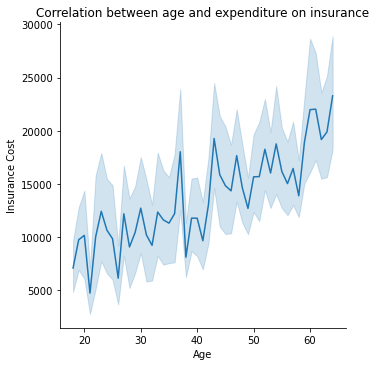

In [32]:
# 10-1. Testing correlation between age and insurance charges

sns.relplot(data = insurance_df, kind = 'line', x = 'age', y = 'charges')
plt.title('Correlation between age and expenditure on insurance')
plt.xlabel('Age')
plt.ylabel('Insurance Cost')
plt.show()

In [37]:
# 10-2. Testing correlation between gender and insurance charges

## First we need to make sure that all other variables are equal. 
## Otherwise, the results could be misleading.
## Thus, data will be filtered based on follows: non-smoker, 30 years old, 1 kid, same region

non_smoker_30 = insurance_df[(insurance_df['smoker'] == 'no') & (insurance_df['age'] == 30) & 
                             (insurance_df['children'] == 1)].sort_values(by = 'bmi').reset_index(drop = True)



non_smoker_30_clean = non_smoker_30.drop(8) # removing the last column which is an outlier
display(non_smoker_30_clean)

display(non_smoker_30_clean.groupby('sex', as_index = False)['bmi'].mean()) # achieved a similar average BMI
print(non_smoker_30_clean.groupby(['region', 'sex', 'bmi'])['charges'].mean())

## There is not significant discrepency between m/f regarding charges except for southwest and northeast regions
## In this case, more comprehensive research is needed to discern the cause of such an anomaly

,age,sex,bmi,children,smoker,region,charges
0,30,female,21.945,1,no,northeast,4718.20355
1,30,female,22.895,1,no,northeast,4719.52405
2,30,male,24.130,1,no,northwest,4032.24070
3,30,male,27.645,1,no,northeast,4237.12655
4,30,female,28.405,1,no,northwest,4527.18295
5,30,male,31.400,1,no,southwest,3659.34600
6,30,female,32.400,1,no,southwest,4149.73600
7,30,female,33.330,1,no,southeast,4151.02870


,sex,bmi
0,female,27.795
1,male,27.725


region     sex     bmi   
northeast  female  21.945    4718.20355
                   22.895    4719.52405
           male    27.645    4237.12655
northwest  female  28.405    4527.18295
           male    24.130    4032.24070
southeast  female  33.330    4151.02870
southwest  female  32.400    4149.73600
           male    31.400    3659.34600
Name: charges, dtype: float64


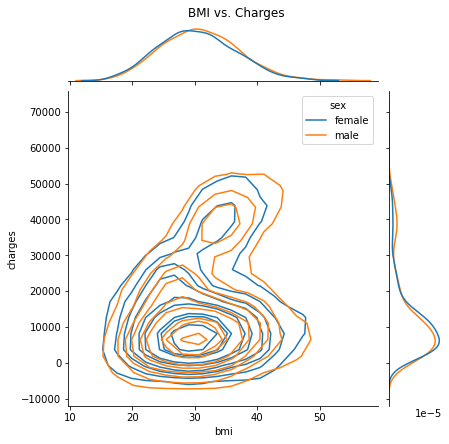

In [22]:
# 10-3. Testing correlation between BMI and insurance charges

sns.jointplot(x='bmi', y='charges', data=insurance_df, kind = "kde", gridsize=20, hue = 'sex')
plt.suptitle("BMI vs. Charges", y=1.02)
plt.show()

## According to the graph below, the insurance charges paid by men and women are very similar. 
## Although for some reason men with a higher BMI (between 40 and 50) are charged more on average than women.

In [23]:
# 10-4. Testing the correlation between the number of children and insurance costs


display(insurance_df[insurance_df['smoker'] == 'no'].groupby('children', as_index = False)['charges'].mean()) # Average charges per number of children
non_smoker = insurance_df[insurance_df['smoker'] == 'no']


,children,charges
0,0,7611.793335
1,1,8303.109350
2,2,9493.093674
3,3,9614.519391
4,4,12121.344408
5,5,8183.845556


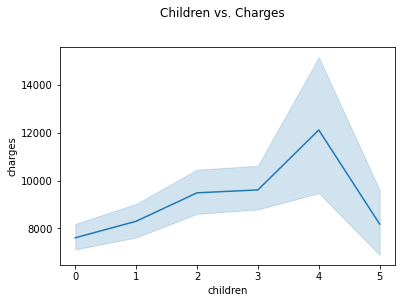

In [24]:
sns.lineplot(x='children', y='charges', data=non_smoker)
plt.suptitle("Children vs. Charges", y=1.02)
plt.show()

## Based on the findings, it appears that the number of children has a proportional impact on insurance costs. 
## The charges show a decreasing trend when the number of children reaches five. 
## However, considering the significant role played by the age of the children, 
## such a decline can be reasonably understood.

,smoker,region,charges
0,no,northeast,9165.531672
1,no,northwest,8556.463715
2,no,southeast,8032.216309
3,no,southwest,8019.284513
4,yes,northeast,29673.536473
5,yes,northwest,30192.003182
6,yes,southeast,34844.996824
7,yes,southwest,32269.063494


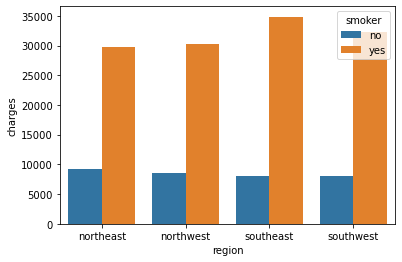

In [25]:
# 10-5. Testing the correlation between the smokers and insurance costs

## As already demonstrated in the 9th section, smokers spend 3.8 times more on insurance than non-smokers


smoker_charges = insurance_df.groupby(['smoker', 'region'], as_index = False)['charges'].mean() 

display(smoker_charges) # Average charges based on smoker and region variables

sns.barplot(data=smoker_charges, x="region", y="charges", hue="smoker")
plt.show()

## Although there is no significant difference in charges for non-smokers, 
## southern regions appear to pay more for insurance costs.